/var/folders/9z/f33049_x6bs5y2xvclxp23j00000gn/T/ipykernel_96155/3763945101.py:110: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


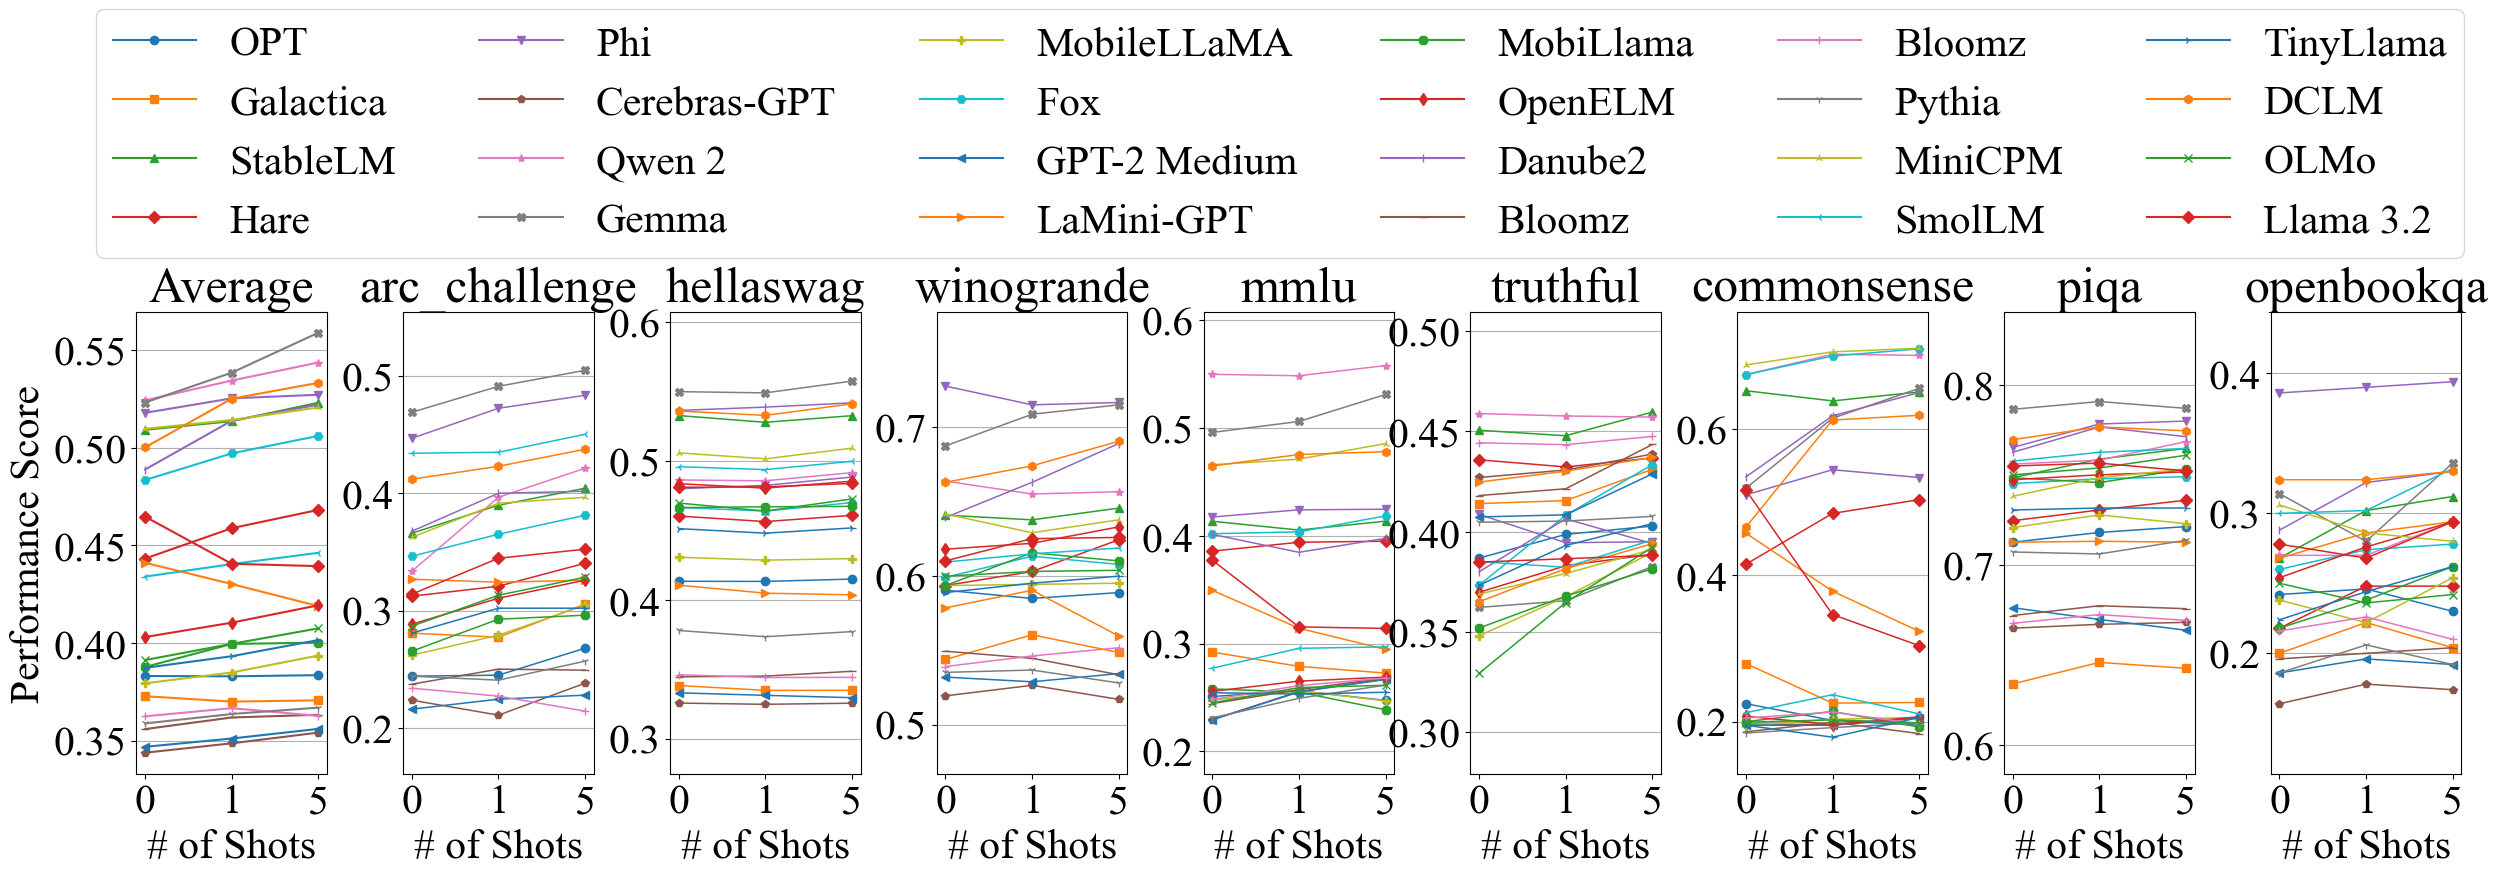

In [26]:
import json
import matplotlib.pyplot as plt
import re
import numpy as np

# 统一改变字体大小
plt.rcParams.update({'font.size': 30})
# 设置字体为 Times New Roman
plt.rcParams.update({'font.family': 'Times New Roman'})

# 加载数据集
with open('dataset_records_old.json', 'r') as f:
    data = json.load(f)

# 定义要比较的任务和模型
tasks = ["arc_challenge", "hellaswag", "winogrande", "mmlu", "truthfulqa_mc2", "commonsense_qa", "piqa", "openbookqa"]
models = ["facebook/opt-1.3b", "facebook/galactica-1.3b", "stabilityai/stablelm-2-zephyr-1_6b", "LiteAI/Hare-1.1B-base-0.5v", "microsoft/phi-1_5", "cerebras/Cerebras-GPT-1.3B", "Qwen/Qwen2-1.5B", "google/gemma-2-2b", "mtgv/MobileLLaMA-1.4B-Base", "tensoropera/Fox-1-1.6B", "openai-community/gpt2-medium", "MBZUAI/LaMini-GPT-1.5B", "MBZUAI/MobiLlama-1B", "apple/OpenELM-1_1B", "h2oai/h2o-danube2-1.8b-base", "bigscience/bloom-1b1", "bigscience/bloomz-1b1", "EleutherAI/pythia-1b", "openbmb/MiniCPM-1B-sft-bf16", "HuggingFaceTB/SmolLM-1.7B", "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T", 
"TRI-ML/DCLM-1B", "allenai/OLMo-1B-hf", "meta-llama/Llama-3.2-1B"]

# 自定义每个模型的标签（不带参数）
custom_labels = {
    "facebook/opt-1.3b": "OPT",
    "facebook/galactica-1.3b": "Galactica",
    "stabilityai/stablelm-2-zephyr-1_6b": "StableLM",
    "LiteAI/Hare-1.1B-base-0.5v": "Hare",
    "microsoft/phi-1_5": "Phi",
    "cerebras/Cerebras-GPT-1.3B": "Cerebras-GPT",
    "Qwen/Qwen2-1.5B": "Qwen 2",
    "google/gemma-2-2b": "Gemma",
    "mtgv/MobileLLaMA-1.4B-Base": "MobileLLaMA",
    "tensoropera/Fox-1-1.6B": "Fox",
    "openai-community/gpt2-medium": "GPT-2 Medium",
    "MBZUAI/LaMini-GPT-1.5B": "LaMini-GPT",
    "MBZUAI/MobiLlama-1B": "MobiLlama",
    "apple/OpenELM-1_1B": "OpenELM",
    "h2oai/h2o-danube2-1.8b-base": "Danube2",
    "bigscience/bloom-1b1": "Bloomz",
    "bigscience/bloomz-1b1": "Bloomz",
    "EleutherAI/pythia-1b": "Pythia",
    "openbmb/MiniCPM-1B-sft-bf16": "MiniCPM",
    "HuggingFaceTB/SmolLM-1.7B": "SmolLM",
    "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T": "TinyLlama",
    "TRI-ML/DCLM-1B": "DCLM",
    "allenai/OLMo-1B-hf": "OLMo",
    "meta-llama/Llama-3.2-1B": "Llama 3.2",
}

# 确定顺序
example_order = ["0", "1", "5"]

# 提取模型的参数大小
def extract_model_size(model_name):
    match = re.search(r'(\d+(\.\d+)?[mbMBgG])', model_name)
    return match.group(0) if match else "Unknown"

# 生成不同的 marker 形状
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'P', 'H', '<', '>', '8', 'd', '|', '_', '+', '1', '2', '3', '4', 'h', 'x', 'D', 'o', 's', '^', 'v', 'p', '*', 'X', 'P', 'H', '<', '>', '8', 'd', '|', '_', '+', '1', '2', '3', '4', 'h', 'x', 'D']

# 计算每个模型的平均表现
average_performance = {}
for model in models:
    total_scores = []
    for task in tasks:
        if task in data[model]:
            scores = data[model][task]
            values = [scores.get(example, 0) for example in example_order]
            total_scores.append(values)
    if total_scores:
        average_performance[model] = np.mean(total_scores, axis=0)

# 创建1*n的子图布局
fig, axs = plt.subplots(1, len(tasks) + 1, figsize=(30, 6))

plt.subplots_adjust(wspace=0.4)
# 第一个图显示所有模型的平均表现
for i, (model, avg_scores) in enumerate(average_performance.items()):
    model_size = extract_model_size(model)
    custom_label = custom_labels.get(model, model.split("/")[1].split("-")[0])  # 使用自定义标签
    axs[0].plot(example_order, avg_scores, marker=markers[i % len(markers)], label=custom_label)

axs[0].set_title('Average')
axs[0].set_xlabel('# of Shots')
axs[0].set_ylabel('Performance Score')
axs[0].legend(ncol=6, bbox_to_anchor=(6, 1.7), loc='upper center', fontsize=30)
axs[0].grid(axis='y')

# 其他图显示各个任务上的表现
for i, task in enumerate(tasks, 1):
    all_scores = []
    for j, model in enumerate(models):
        if task in data[model]:
            scores = data[model][task]
            values = [scores.get(example, 0) for example in example_order]
            all_scores.extend(values)
            model_size = extract_model_size(model)
            axs[i].plot(example_order, values, marker=markers[j % len(markers)], label=f'{model_size} - {model}', linewidth=1.1)

    # 动态设置纵坐标范围
    min_score = min(all_scores)
    max_score = max(all_scores)
    axs[i].set_ylim(min_score - 0.05, max_score + 0.05)

    axs[i].set_title(task)
    axs[i].set_xlabel('# of Shots')
    axs[i].grid(axis='y')

axs[5].set_title('truthful')
axs[6].set_title('commonsense')
# 调整布局并显示图像
plt.tight_layout()
plt.savefig('../figs/acc-incontext.pdf', bbox_inches='tight')
plt.show()